In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import math
import itertools
from IPython.display import clear_output

%matplotlib inline 
#plt.set_cmap(cm.get_cmap("Spectral_r"))

In [3]:
# initialize empty graph, colors indicate source and sink nodes, weights start at 0

In [25]:
DG = nx.DiGraph()
coords = list(itertools.product(list(range(1,7)),list(range(1,7))))
#coords = [i for i in coords if i not in {(1,1),(1,6),(6,1),(6,6)}]
for i, pair in enumerate(coords):
    DG.add_node(i, pos=pair, color='grey', name="inner")

nodes = {v: k for k, v in nx.get_node_attributes(DG, "pos").items()}


for pair in nodes:
    right = (pair[0] + 1, pair[1])
    above = (pair[0], pair[1] + 1)
    
    xdir = (pair[0] % 2) == 0
    ydir = (pair[1] % 2) == 0   
    
    if above in nodes:#  and pair[0] not in {1,6}:
        if xdir:
            DG.add_edge(nodes[pair], nodes[above], weight = 0, orient='vertical')
        else:
            DG.add_edge(nodes[above], nodes[pair], weight = 0, orient='vertical')
            
    if right in nodes: # and pair[1] not in {1,6}:
        if ydir:
            DG.add_edge(nodes[pair], nodes[right], weight = 0, orient='horizontal')
        else:
            DG.add_edge(nodes[right], nodes[pair], weight = 0, orient='horizontal')
            

for node in DG.nodes:
    border_h = DG.nodes[node]["pos"][0] in {1,6}
    border_v = DG.nodes[node]["pos"][1] in {1,6}
    
    outedges_h = len([i for i in DG.out_edges(node) if DG.edges[i]['orient'] == 'horizontal'])
    outedges_v = len([i for i in DG.out_edges(node) if DG.edges[i]['orient'] == 'vertical'])
    
    inedges_h = len([i for i in DG.in_edges(node) if DG.edges[i]['orient'] == 'horizontal'])
    inedges_v = len([i for i in DG.in_edges(node) if DG.edges[i]['orient'] == 'vertical'])
    
    if (border_h and outedges_h > 0) or (border_v and outedges_v > 0):
        DG.nodes[node]["name"] = "source"
        DG.nodes[node]["color"] = "green"
    elif (border_h and inedges_h > 0) or (border_v and inedges_v > 0):
        DG.nodes[node]["name"] = "sink"
        DG.nodes[node]["color"] = "red"

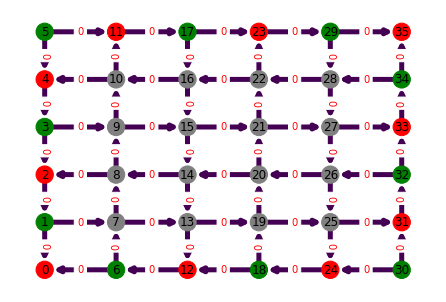

In [26]:
colors = nx.get_edge_attributes(DG,'weight').values()
pos = nx.get_node_attributes(DG,'pos')
nodecol = nx.get_node_attributes(DG, 'color').values()
nx.draw(DG, pos, 
        edge_color=colors,
        width=5.0,
        node_color=nodecol,
        with_labels=True)
nx.draw_networkx_edge_labels(DG,pos,edge_labels=nx.get_edge_attributes(DG,"weight"),font_color='red')

plt.show()

In [ ]:
flowrate = 10
inrate = 10
outrate = 5

for i in range(50):
    if (i % 2 == 0):
        trafficdir = "horizontal"
    else:
        trafficdir = "vertical"

    for node in DG.nodes:
        if DG.nodes[node]["name"] == "source":
            for u,v in DG.out_edges(node):
                edge = DG.edges[u,v]
                if edge['orient'] == trafficdir:
                    update = {(u,v):{"weight": edge['weight'] + inrate}}
                    nx.set_edge_attributes(DG, update)
        
        elif DG.nodes[node]["name"] == "inner":
            passthrough = 0
            for u,v in DG.in_edges(node):
                edge = DG.edges[u,v]
                if edge['orient'] == trafficdir:
                    passthrough = passthrough + min(edge['weight'], flowrate)
                    update = {(u,v):{"weight":  edge['weight'] - passthrough}}
                    nx.set_edge_attributes(DG, update)
            
            pipes = len(DG.out_edges(node))
            passthrough = math.floor(passthrough / pipes)
            for u,v in DG.out_edges(node):
                edge = DG.edges[u,v]
                update = {(u,v):{"weight":  edge['weight'] + passthrough}}
                nx.set_edge_attributes(DG, update)
        
        elif DG.nodes[node]["name"] == "sink":
            for u,v in DG.in_edges(node):
                edge = DG.edges[u,v]
                if edge['orient'] == trafficdir:
                    update = {(u,v):{"weight": max(0, edge['weight'] - outrate)}}
                    nx.set_edge_attributes(DG, update)
    
    clear_output(wait=True)
    colors = nx.get_edge_attributes(DG,'weight').values()
    pos = nx.get_node_attributes(DG,'pos')
    nodecol = nx.get_node_attributes(DG, 'color').values()
    nx.draw(DG, pos, 
            edge_color=colors,
            width=5.0,
            with_labels=True,
            node_color=nodecol)
    nx.draw_networkx_edge_labels(DG,pos,edge_labels=nx.get_edge_attributes(DG,"weight"),font_color='red')
    
    plt.show()
    time.sleep(1)
    
        
        